**Movie Review - Sentiment Analysis - Classify the sentiment of sentences from the Rotten Tomatoes dataset**

**Developing Machine Learning Models using TF - IDF as feature extraction / representation**

**Load the required libraries**

In [0]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [2]:
!pip install scikit-plot

**Load Trainig and testing dataset**

In [0]:
df = pd.read_csv("/content/train.tsv", sep="\t")

In [0]:
df_test = pd.read_csv("/content/test.tsv", sep="\t")

**Preview of datasets**

In [13]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [14]:
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


**Creating the TF - IDF vectorizer**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(df['Phrase'].values) + list(df_test['Phrase'].values)

vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(df['Phrase'])
test_vectorized = vectorizer.transform(df_test['Phrase'])

In [16]:
print("Train set dimensions after applying TF-IDF vectorizer:")
np.shape(train_vectorized)

Train set dimensions after applying TF-IDF vectorizer:


(156060, 301627)

In [0]:
X = train_vectorized
y = df.Sentiment.values


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time

# split the data into 80:20 for training and validating.
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [0]:

ml_default_performance_metrics_df = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['LogisticRegression', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier', 'LinearSVC', 'BernoulliNB', 'MultinomialNB', 'KNeighborsClassifier'])

**Machine learning techniques used**

**1. Multinomial Logistic Regression**

              precision    recall  f1-score   support

           0       0.62      0.16      0.26      1414
           1       0.56      0.33      0.42      5455
           2       0.65      0.91      0.76     15917
           3       0.60      0.43      0.50      6585
           4       0.68      0.21      0.32      1841

    accuracy                           0.63     31212
   macro avg       0.62      0.41      0.45     31212
weighted avg       0.62      0.63      0.60     31212


accuracy_score 0.631840317826477

Weighted Averaged validation metrics
precision_score 0.6232831390820265
recall_score 0.631840317826477
f1_score 0.5951997402747816


elapsed time in seconds:  19.067740440368652



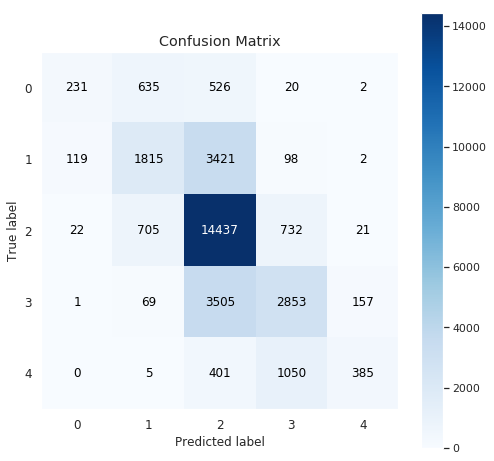

In [41]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

clf_logistic_regression = LogisticRegression(multi_class='ovr', solver='sag', random_state=42)
clf_logistic_regression.fit(xtrain, ytrain)
predictions = clf_logistic_regression.predict(xvalid)

print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


ml_default_performance_metrics_df.loc['LogisticRegression']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LogisticRegression']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['LogisticRegression']['F1-score'] = f1_score(yvalid, predictions, average='micro')


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**Multinomial Logistic Regression results in a good accuracy of 63% and F1 score of 59%**

**2. Decision Tree Classifier**


Evaluation of DecisionTreeClassifier, with train-test split:
              precision    recall  f1-score   support

           0       0.31      0.24      0.27      1414
           1       0.41      0.33      0.37      5455
           2       0.65      0.77      0.71     15917
           3       0.42      0.36      0.39      6585
           4       0.34      0.25      0.29      1841

    accuracy                           0.55     31212
   macro avg       0.43      0.39      0.40     31212
weighted avg       0.53      0.55      0.54     31212


accuracy_score 0.5517749583493529

Weighted Averaged validation metrics
precision_score 0.528135877674154
recall_score 0.5517749583493529
f1_score 0.5358109197623023


elapsed time in seconds:  846.5855906009674



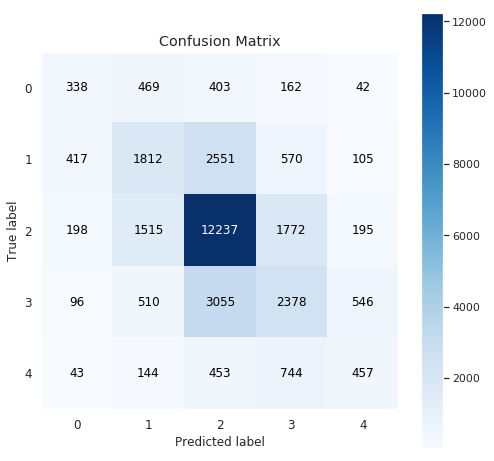

In [42]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
    
print()
print("Evaluation of DecisionTreeClassifier, with train-test split:")

clf_DecisionTreeClassifier = DecisionTreeClassifier(random_state=42)
clf_DecisionTreeClassifier.fit(xtrain, ytrain)
predictions = clf_DecisionTreeClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['DecisionTreeClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**Decision tree classifier results in less accuracy of  55% and F1 score is 53%**

**3. Extra Trees Classifier**

ExtraTrees implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting


Evaluation of ExtraTreesClassifier with train-test split:
              precision    recall  f1-score   support

           0       0.43      0.37      0.40      1414
           1       0.53      0.45      0.49      5455
           2       0.70      0.82      0.75     15917
           3       0.56      0.44      0.49      6585
           4       0.48      0.36      0.42      1841

    accuracy                           0.63     31212
   macro avg       0.54      0.49      0.51     31212
weighted avg       0.61      0.63      0.62     31212


accuracy_score 0.6278674868640266

Weighted Averaged validation metrics
precision_score 0.6128795109007072
recall_score 0.6278674868640266
f1_score 0.6155181761347517


elapsed time in seconds:  1473.628540277481



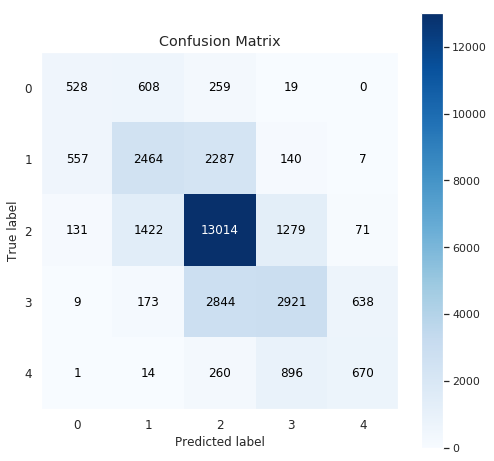

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

start_time = time.time()
    
print()
print("Evaluation of ExtraTreesClassifier with train-test split:")

clf_ExtraTreesClassifier = ExtraTreesClassifier(n_estimators=10, random_state=42)
clf_ExtraTreesClassifier.fit(xtrain, ytrain)
predictions = clf_ExtraTreesClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['ExtraTreesClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['ExtraTreesClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['ExtraTreesClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**Extra Trees Classifier results in a good accuracy of  63%and F1 score of 61%**

**4. Random Forest Classifier**


Evaluation of RandomForestClassifier with train-test split:
              precision    recall  f1-score   support

           0       0.45      0.34      0.39      1414
           1       0.53      0.40      0.46      5455
           2       0.67      0.85      0.75     15917
           3       0.56      0.39      0.46      6585
           4       0.50      0.32      0.39      1841

    accuracy                           0.62     31212
   macro avg       0.54      0.46      0.49     31212
weighted avg       0.60      0.62      0.60     31212


accuracy_score 0.6217160066641035

Weighted Averaged validation metrics
precision_score 0.6030226749717309
recall_score 0.6217160066641035
f1_score 0.6006798242227042


elapsed time in seconds:  680.2238507270813



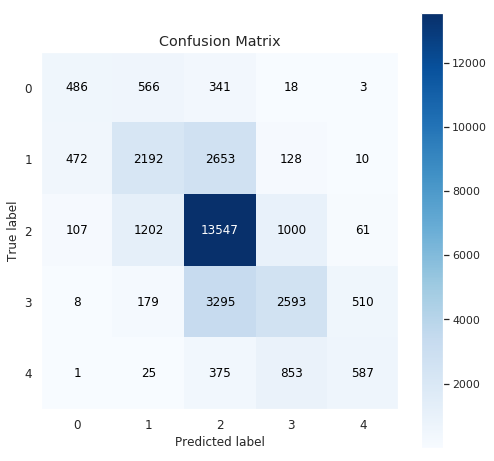

In [44]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
    
print()
print("Evaluation of RandomForestClassifier with train-test split:")

clf_RandomForestClassifier = RandomForestClassifier(n_estimators = 10, random_state=42)
clf_RandomForestClassifier.fit(xtrain, ytrain)
predictions = clf_RandomForestClassifier.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['RandomForestClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['RandomForestClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['RandomForestClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**Random Forest Classifier also  results in a good accuracy of  62% and F1 score of 60%**

**5. Linear SVC**


Evaluation of LinearSVC, multi_class='ovr', with train-test split:
              precision    recall  f1-score   support

           0       0.48      0.36      0.41      1414
           1       0.55      0.50      0.52      5455
           2       0.73      0.82      0.77     15917
           3       0.58      0.52      0.55      6585
           4       0.54      0.41      0.47      1841

    accuracy                           0.65     31212
   macro avg       0.58      0.52      0.54     31212
weighted avg       0.64      0.65      0.65     31212


accuracy_score 0.6542675893886967

Weighted Averaged validation metrics
precision_score 0.6430068928938866
recall_score 0.6542675893886967
f1_score 0.6457990516414972


elapsed time in seconds:  12.522583484649658



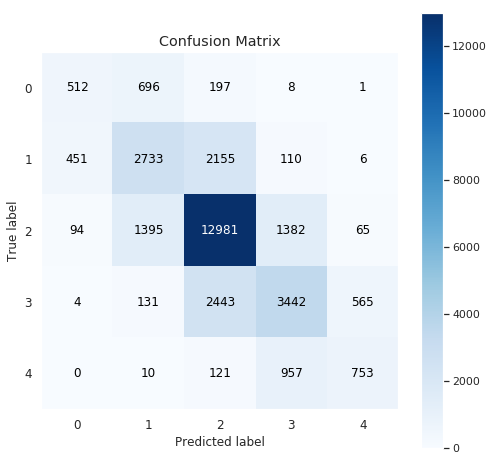

In [45]:
from sklearn.svm import LinearSVC

start_time = time.time()
    
print()
print("Evaluation of LinearSVC, multi_class='ovr', with train-test split:")

clf_LinearSVC = LinearSVC(multi_class='ovr', random_state=42)
clf_LinearSVC.fit(xtrain, ytrain)
predictions = clf_LinearSVC.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['LinearSVC']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LinearSVC']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['LinearSVC']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**Linear SVC classifier exhibits great accuracy so far 65% and F1-score 64%**

**6. Bernoulli NB**


Evaluation of BernoulliNB with train-test split:
              precision    recall  f1-score   support

           0       0.47      0.17      0.25      1414
           1       0.53      0.36      0.43      5455
           2       0.63      0.87      0.73     15917
           3       0.55      0.36      0.44      6585
           4       0.51      0.20      0.29      1841

    accuracy                           0.60     31212
   macro avg       0.54      0.39      0.43     31212
weighted avg       0.58      0.60      0.57     31212


accuracy_score 0.6023324362424708

Weighted Averaged validation metrics
precision_score 0.5822905752433739
recall_score 0.6023324362424708
f1_score 0.568561801602859


elapsed time in seconds:  0.5346286296844482



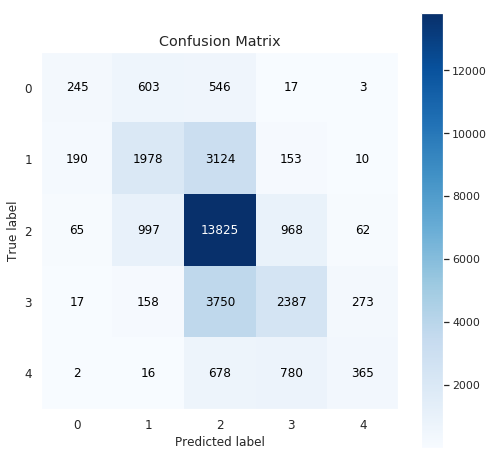

In [46]:
from sklearn.naive_bayes import BernoulliNB

start_time = time.time()
    
print()
print("Evaluation of BernoulliNB with train-test split:")

clf_BernoulliNB = BernoulliNB()
clf_BernoulliNB.fit(xtrain, ytrain)
predictions = clf_BernoulliNB.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['BernoulliNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['BernoulliNB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['BernoulliNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**Bernoulli NB results in a accuracy of 60% and F1 score 56%**

**7. Multinomial NB**


Evaluation of MultinomialNB with train-test split:
              precision    recall  f1-score   support

           0       0.76      0.04      0.07      1414
           1       0.57      0.25      0.35      5455
           2       0.61      0.93      0.74     15917
           3       0.59      0.39      0.47      6585
           4       0.76      0.05      0.10      1841

    accuracy                           0.61     31212
   macro avg       0.66      0.33      0.35     31212
weighted avg       0.62      0.61      0.55     31212


accuracy_score 0.6064654620017942

Weighted Averaged validation metrics
precision_score 0.6150381651913431
recall_score 0.6064654620017942
f1_score 0.5463158424084111


elapsed time in seconds:  0.35625147819519043



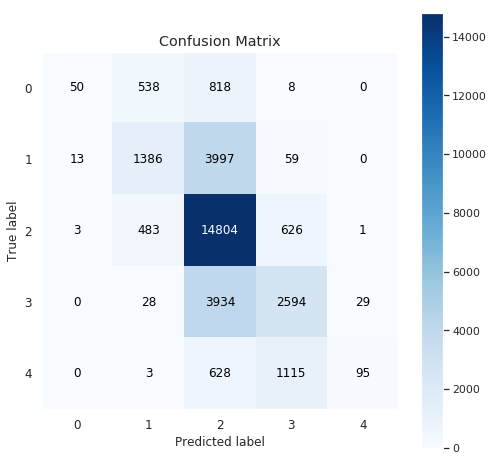

In [47]:
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
    
print()
print("Evaluation of MultinomialNB with train-test split:")

clf_MultinomialNB = MultinomialNB()
clf_MultinomialNB.fit(xtrain, ytrain)
predictions = clf_MultinomialNB.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['MultinomialNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['MultinomialNB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['MultinomialNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**Multinomail NB results in a accuracy of 61% and F1 score 55%**

**8. KNeighbors Classifier**

              precision    recall  f1-score   support

           0       0.36      0.41      0.39      1414
           1       0.46      0.51      0.48      5455
           2       0.70      0.72      0.71     15917
           3       0.53      0.47      0.50      6585
           4       0.50      0.32      0.39      1841

    accuracy                           0.59     31212
   macro avg       0.51      0.49      0.49     31212
weighted avg       0.59      0.59      0.59     31212


accuracy_score 0.5936178392925798

Weighted Averaged validation metrics
precision_score 0.5925673884041481
recall_score 0.5936178392925798
f1_score 0.591274430438813


elapsed time in seconds:  106.34341859817505



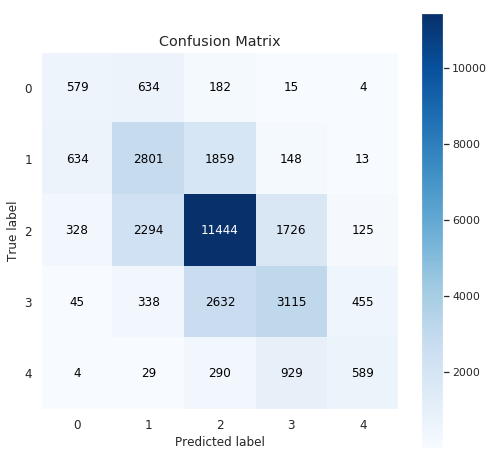

In [48]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

clf_knn = KNeighborsClassifier()
clf_knn.fit(xtrain, ytrain)
predictions = clf_knn.predict(xvalid)

print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['KNeighborsClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['KNeighborsClassifier']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['KNeighborsClassifier']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**K neighbours results in a accuracy of 59% and F1 score 59%**

**Summarizing ML Classifiers based on their accuracy with TF - IDF as Feature Extraction**


In [49]:
ml_default_performance_metrics_df.sort_values(by="accuracy", ascending=False)

,accuracy,F1-score,training-time
LinearSVC,0.654268,0.645799,12.4314
LogisticRegression,0.63184,0.63184,19.0526
ExtraTreesClassifier,0.627867,0.615518,1473.23
RandomForestClassifier,0.621716,0.60068,680.133
MultinomialNB,0.606465,0.546316,0.268005
BernoulliNB,0.602332,0.568562,0.444496
KNeighborsClassifier,0.593618,0.591274,106.251
DecisionTreeClassifier,0.551775,0.535811,846.571


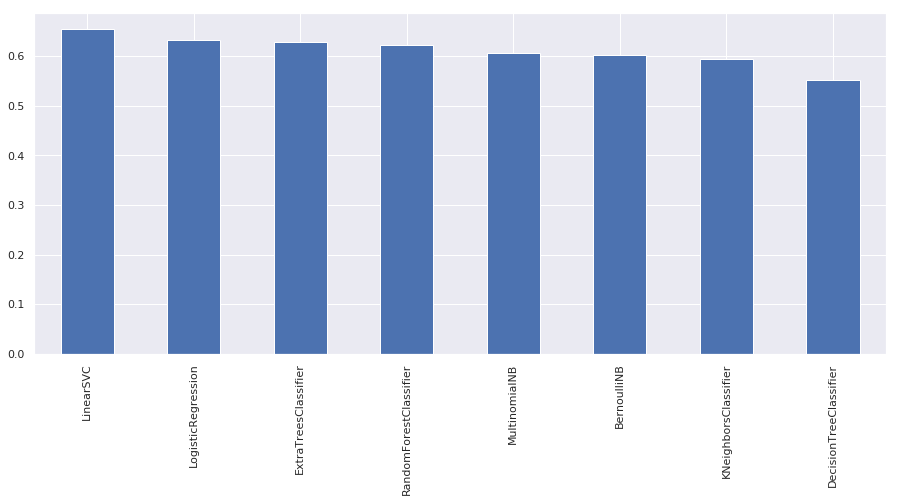

In [50]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
ml_default_performance_metrics_df.sort_values(by="accuracy", ascending=False).accuracy.plot(kind="bar")

**Summarizing ML Classifiers based on their F1-score with TF - IDF as Feature Extraction**

In [51]:
ml_default_performance_metrics_df.sort_values(by="F1-score", ascending=True)


,accuracy,F1-score,training-time
DecisionTreeClassifier,0.551775,0.535811,846.571
MultinomialNB,0.606465,0.546316,0.268005
BernoulliNB,0.602332,0.568562,0.444496
KNeighborsClassifier,0.593618,0.591274,106.251
RandomForestClassifier,0.621716,0.60068,680.133
ExtraTreesClassifier,0.627867,0.615518,1473.23
LogisticRegression,0.63184,0.63184,19.0526
LinearSVC,0.654268,0.645799,12.4314


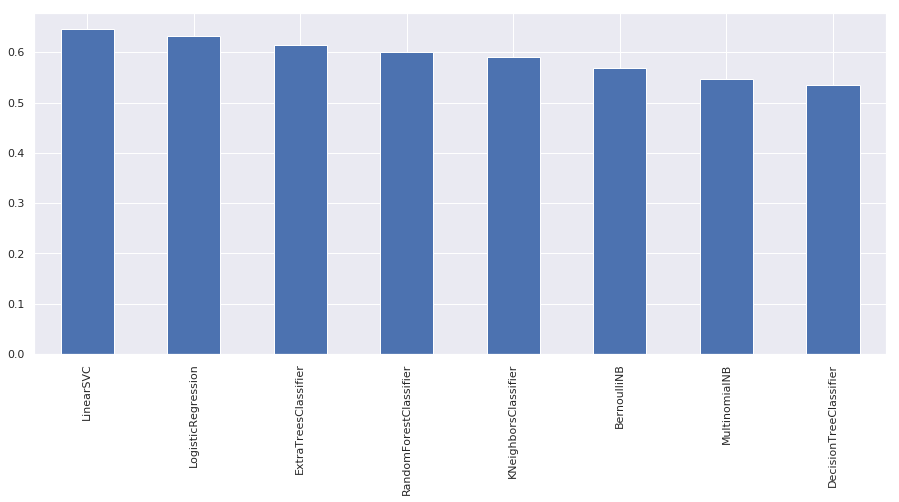

In [52]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
ml_default_performance_metrics_df.sort_values(by="F1-score", ascending=False)["F1-score"].plot(kind="bar")

**Summarizing ML Classifiers based on their training fitting time with TF - IDF as Feature Extraction**

In [53]:
ml_default_performance_metrics_df.sort_values(by="training-time", ascending=True)

,accuracy,F1-score,training-time
MultinomialNB,0.606465,0.546316,0.268005
BernoulliNB,0.602332,0.568562,0.444496
LinearSVC,0.654268,0.645799,12.4314
LogisticRegression,0.63184,0.63184,19.0526
KNeighborsClassifier,0.593618,0.591274,106.251
RandomForestClassifier,0.621716,0.60068,680.133
DecisionTreeClassifier,0.551775,0.535811,846.571
ExtraTreesClassifier,0.627867,0.615518,1473.23


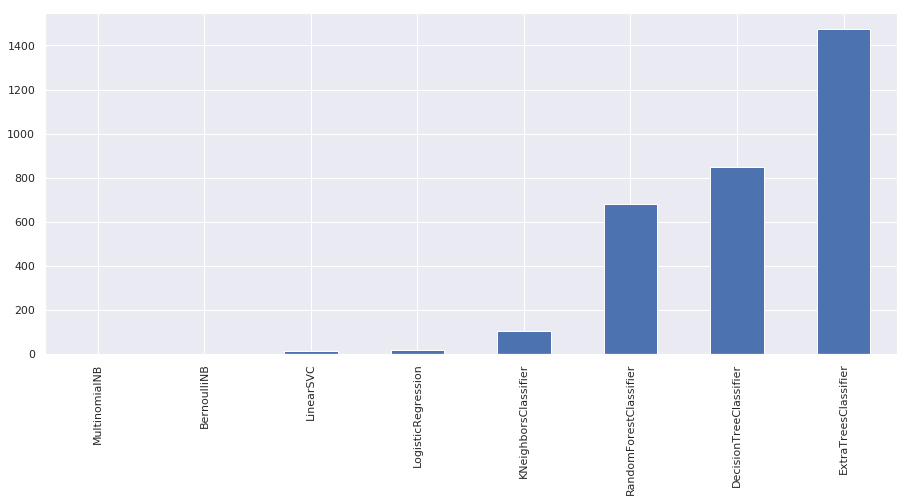

In [54]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
ml_default_performance_metrics_df.sort_values(by="training-time", ascending=True)["training-time"].plot(kind="bar")

**Top 4 models with High accuracy**

1. LinearSVC (SVM Classifier)
2. Logistic Regression Classifier
3. ExtraTreesClassifier
4. RandomForestClassfier




**Ensemble Top 4 Models over the validation Set**

              precision    recall  f1-score   support

           0       0.48      0.39      0.43      1414
           1       0.55      0.48      0.51      5455
           2       0.69      0.86      0.77     15917
           3       0.60      0.43      0.50      6585
           4       0.58      0.29      0.39      1841

    accuracy                           0.65     31212
   macro avg       0.58      0.49      0.52     31212
weighted avg       0.63      0.65      0.63     31212


accuracy_score 0.6460976547481738

Weighted Averaged validation metrics
precision_score 0.6324936572926767
recall_score 0.6460976547481738
f1_score 0.62821923478184



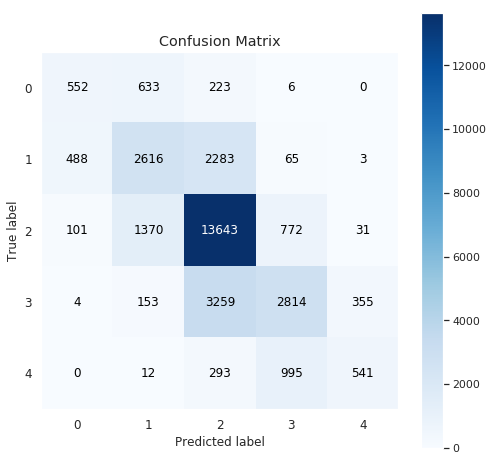

In [58]:
predictions_linear_svc = clf_LinearSVC.predict(xvalid)
predictions_extra_trees = clf_ExtraTreesClassifier.predict(xvalid)
predictions_logistic_regression = clf_logistic_regression.predict(xvalid)
predictions_random_forest = clf_RandomForestClassifier.predict(xvalid)

ensemble_all_ml_default_pred_df = pd.DataFrame({
    'linear_svc':predictions_linear_svc,
    'logistic_regression':predictions_logistic_regression,
    'extra_trees':predictions_extra_trees,
    'random_forest':predictions_random_forest})


# ensemble classes' predictions over the validation set
pred_mode = ensemble_all_ml_default_pred_df.agg('mode',axis=1)[0].values

print(classification_report(yvalid, pred_mode))

print()
print("accuracy_score", accuracy_score(yvalid, pred_mode))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, pred_mode, average='weighted'))
print("recall_score", recall_score(yvalid, pred_mode, average='weighted'))
print("f1_score", f1_score(yvalid, pred_mode, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, pred_mode)

**Producing Predictions for the Test Set for the top 4 best performed ML models**


In [0]:
df_test = pd.read_csv('/content/test.tsv', sep="\t")

test_vectorized = vectorizer.transform(df_test['Phrase'])

predictions_default_linear_svc = clf_LinearSVC.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_default_linear_svc
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_linear_svc.csv',index=False)

predictions_default_logistic_regression = clf_logistic_regression.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_default_logistic_regression
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_logistic_regression.csv',index=False)

predictions_default_extra_trees = clf_ExtraTreesClassifier.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_default_extra_trees
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_extra_trees.csv',index=False)

predictions_default_random_forest = clf_RandomForestClassifier.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_default_random_forest
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_random_forest.csv',index=False)

**Tuning the top 4 best performed ML Models**

In [0]:
ml_tuning_performance_metrics_df = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['LogisticRegression', 'ExtraTreesClassifier', 'RandomForestClassifier', 'LinearSVC'])

**LinearSVC tuning**

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time

start_time = time.time()
print("Linear SVC grid Search:")

clf_linear_svc_grid = LinearSVC(multi_class='ovr', random_state=42)

X = train_vectorized
y = df.Sentiment.values

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

gsc_linear_svc = GridSearchCV(
    estimator=clf_linear_svc_grid,
    param_grid={
        'C': [10e-1, 10e-2, 1, 10],
        'tol': [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e-0, 10e+1],
    },
    scoring='accuracy',
    cv=2
)

grid_result_linear_svc = gsc_linear_svc.fit(xtrain, ytrain)

print()
print("ExtraTreesClassifier best parameters and score")
print("Best score: %f using %s" % (grid_result_linear_svc.best_score_, grid_result_linear_svc.best_params_))

prediction_tuned_linear_svc = gsc_linear_svc.predict(xvalid)
print("accuracy score after tuning:", accuracy_score(yvalid, prediction_tuned_linear_svc))

ml_tuning_performance_metrics_df.loc['LinearSVC']['training-time'] = time.time() - start_time
ml_tuning_performance_metrics_df.loc['LinearSVC']['accuracy'] = accuracy_score(yvalid, prediction_tuned_linear_svc)
ml_tuning_performance_metrics_df.loc['LinearSVC']['F1-score'] = f1_score(yvalid, prediction_tuned_linear_svc, average='macro')

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

Linear SVC grid Search:

ExtraTreesClassifier best parameters and score
Best score: 0.624135 using {'C': 1.0, 'tol': 1.0}
accuracy score after tuning: 0.6547802127386902

elapsed time in seconds:  167.63425993919373



**LinearSVC tuning evaluation** 

              precision    recall  f1-score   support

           0       0.48      0.37      0.42      1414
           1       0.55      0.50      0.52      5455
           2       0.72      0.82      0.77     15917
           3       0.59      0.51      0.55      6585
           4       0.54      0.41      0.47      1841

    accuracy                           0.65     31212
   macro avg       0.58      0.52      0.54     31212
weighted avg       0.64      0.65      0.65     31212


accuracy_score 0.6547802127386902

Weighted Averaged validation metrics
precision_score 0.6427322451186931
recall_score 0.6547802127386902
f1_score 0.6452131514840596



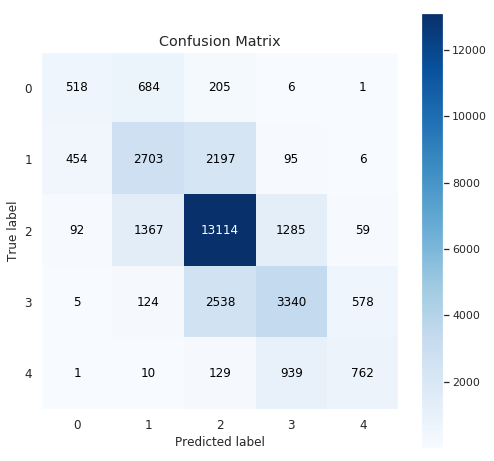

In [25]:
predictions_tuned_linear_svc = grid_result_linear_svc.predict(xvalid)

print(classification_report(yvalid, predictions_tuned_linear_svc))

print()
print("accuracy_score", accuracy_score(yvalid, predictions_tuned_linear_svc))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions_tuned_linear_svc, average='weighted'))
print("recall_score", recall_score(yvalid, predictions_tuned_linear_svc, average='weighted'))
print("f1_score", f1_score(yvalid, predictions_tuned_linear_svc, average='weighted'))


print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions_tuned_linear_svc)

**In Linear SVC tuning there is no improvement in accuracy and F1 score**

**Logistic Regression Tuning**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
print("LogisticRegression grid Search:")

clf_logistic_regression_grid = LogisticRegression(multi_class = 'ovr', random_state=42)

X = train_vectorized
y = df.Sentiment.values

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

gsc_logistic_regression = GridSearchCV(
    estimator=clf_logistic_regression_grid,
    param_grid={
        'solver': ['newton-cg', 'sag', 'saga'],
        'C': [10e-1, 10e-2, 1, 10],
        'tol': [10e-4, 10e-3, 10e-2, 10e-1, 10e-0],
    },
    scoring='accuracy',
    cv=2
)

grid_result_logistic_regression = gsc_logistic_regression.fit(xtrain, ytrain)

print()
print("LogisticRegression best parameters and score")
print("Best score: %f using %s" % (grid_result_logistic_regression.best_score_, grid_result_logistic_regression.best_params_))

prediction_tuned_logistic_regression = grid_result_logistic_regression.predict(xvalid)
print("accuracy score after tuning:", accuracy_score(yvalid, prediction_tuned_logistic_regression))

ml_tuning_performance_metrics_df.loc['LogisticRegression']['training-time'] = time.time() - start_time
ml_tuning_performance_metrics_df.loc['LogisticRegression']['accuracy'] = accuracy_score(yvalid, prediction_tuned_logistic_regression)
ml_tuning_performance_metrics_df.loc['LogisticRegression']['F1-score'] = f1_score(yvalid, prediction_tuned_logistic_regression, average='macro')

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

LogisticRegression grid Search:

LogisticRegression best parameters and score
Best score: 0.629734 using {'C': 10, 'solver': 'saga', 'tol': 0.1}
accuracy score after tuning: 0.6581443034730232

elapsed time in seconds:  578.2139675617218



**LogisticRegression tuning evaluation**

              precision    recall  f1-score   support

           0       0.51      0.33      0.40      1414
           1       0.55      0.52      0.53      5455
           2       0.72      0.82      0.77     15917
           3       0.59      0.53      0.56      6585
           4       0.58      0.37      0.45      1841

    accuracy                           0.66     31212
   macro avg       0.59      0.51      0.54     31212
weighted avg       0.65      0.66      0.65     31212


accuracy_score 0.6581443034730232

Weighted Averaged validation metrics
precision_score 0.6468831589744172
recall_score 0.6581443034730232
f1_score 0.6481980588834843



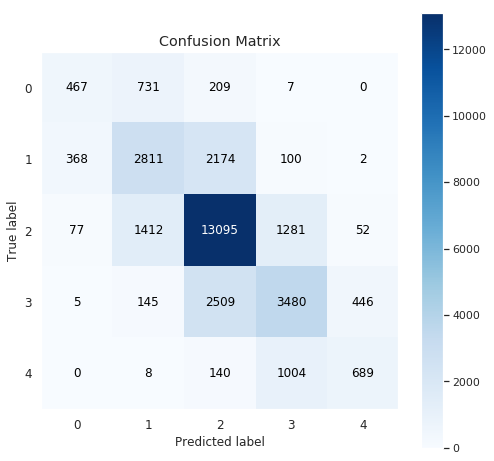

In [27]:
predictions_tuned_logistic_regression = grid_result_logistic_regression.predict(xvalid)

print(classification_report(yvalid, predictions_tuned_logistic_regression))

print()
print("accuracy_score", accuracy_score(yvalid, predictions_tuned_logistic_regression))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions_tuned_logistic_regression, average='weighted'))
print("recall_score", recall_score(yvalid, predictions_tuned_logistic_regression, average='weighted'))
print("f1_score", f1_score(yvalid, predictions_tuned_logistic_regression, average='weighted'))


print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions_tuned_logistic_regression)

**In Logistic Regression tuning also we cannot see any improvement in accuracy and F1 score**

**ExtraTrees Tuning**

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
import time

start_time = time.time()
print("ExtraTreesClassifier grid Search:")

clf_extra_trees_grid = ExtraTreesClassifier(random_state=42)

X = train_vectorized
y = df.Sentiment.values

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

gsc_extra_trees = GridSearchCV(
    estimator=clf_extra_trees_grid,
    param_grid={
        'n_estimators': [2, 4, 6, 8, 10, 12]
    },
    scoring='accuracy',
    cv=2
)

grid_result_extra_trees = gsc_extra_trees.fit(xtrain, ytrain)

print()
print("ExtraTreesClassifier best parameters and score")
print("Best score: %f using %s" % (grid_result_extra_trees.best_score_, grid_result_extra_trees.best_params_))

prediction_tuned_extra_trees = grid_result_extra_trees.predict(xvalid)
print("accuracy score after tuning:", accuracy_score(yvalid, prediction_tuned_extra_trees))

ml_tuning_performance_metrics_df.loc['ExtraTreesClassifier']['training-time'] = time.time() - start_time
ml_tuning_performance_metrics_df.loc['ExtraTreesClassifier']['accuracy'] = accuracy_score(yvalid, prediction_tuned_extra_trees)
ml_tuning_performance_metrics_df.loc['ExtraTreesClassifier']['F1-score'] = f1_score(yvalid, prediction_tuned_extra_trees, average='macro')

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

ExtraTreesClassifier grid Search:

ExtraTreesClassifier best parameters and score
Best score: 0.607290 using {'n_estimators': 12}
accuracy score after tuning: 0.6288927335640139

elapsed time in seconds:  4611.496137857437



**ExtraTrees tuning evaluation**

              precision    recall  f1-score   support

           0       0.43      0.37      0.40      1414
           1       0.53      0.45      0.49      5455
           2       0.70      0.82      0.75     15917
           3       0.56      0.45      0.50      6585
           4       0.48      0.36      0.41      1841

    accuracy                           0.63     31212
   macro avg       0.54      0.49      0.51     31212
weighted avg       0.61      0.63      0.62     31212


accuracy_score 0.6288927335640139

Weighted Averaged validation metrics
precision_score 0.613786877338631
recall_score 0.6288927335640139
f1_score 0.616588849330651



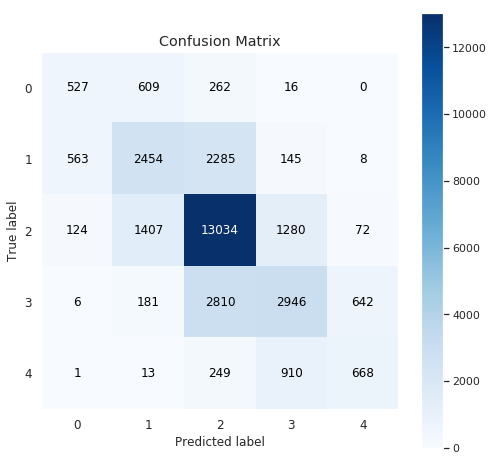

In [20]:
predictions_tuned_extra_trees = grid_result_extra_trees.predict(xvalid)

print(classification_report(yvalid, predictions_tuned_extra_trees))

print()
print("accuracy_score", accuracy_score(yvalid, predictions_tuned_extra_trees))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions_tuned_extra_trees, average='weighted'))
print("recall_score", recall_score(yvalid, predictions_tuned_extra_trees, average='weighted'))
print("f1_score", f1_score(yvalid, predictions_tuned_extra_trees, average='weighted'))


print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions_tuned_extra_trees)

**Again in the ExtraTrees tuning the accuracy and F1 score has no improvement**

**RandomForestClassifier Tuning**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
print("RandomForestClassifier grid Search:")

clf_random_forest = RandomForestClassifier(random_state=42)

X = train_vectorized
y = df.Sentiment.values

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

gsc_random_forest = GridSearchCV(
    estimator=clf_random_forest,
    param_grid={
        'n_estimators': [2, 4, 6, 8, 10, 12]
    },
    scoring='accuracy',
    cv=2
)

grid_result_random_forest = gsc_random_forest.fit(xtrain, ytrain)

print()
print("RandomForest best parameters and score")
print("Best: %f using %s" % (grid_result_random_forest.best_score_, grid_result_random_forest.best_params_))

prediction_tuned_random_forest = grid_result_random_forest.predict(xvalid)
print("accuracy score after tuning:", accuracy_score(yvalid, prediction_tuned_random_forest))

ml_tuning_performance_metrics_df.loc['RandomForestClassifier']['training-time'] = time.time() - start_time
ml_tuning_performance_metrics_df.loc['RandomForestClassifier']['accuracy'] = accuracy_score(yvalid, prediction_tuned_random_forest)
ml_tuning_performance_metrics_df.loc['RandomForestClassifier']['F1-score'] = f1_score(yvalid, prediction_tuned_random_forest, average='macro')

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

RandomForestClassifier grid Search:

RandomForest best parameters and score
Best: 0.596021 using {'n_estimators': 12}
accuracy score after tuning: 0.6253684480328079

elapsed time in seconds:  2321.3432857990265



**RandomForest tuning evaluation**

              precision    recall  f1-score   support

           0       0.45      0.34      0.39      1414
           1       0.54      0.40      0.46      5455
           2       0.67      0.86      0.75     15917
           3       0.57      0.40      0.47      6585
           4       0.50      0.33      0.40      1841

    accuracy                           0.63     31212
   macro avg       0.55      0.46      0.49     31212
weighted avg       0.61      0.63      0.60     31212


accuracy_score 0.6253684480328079

Weighted Averaged validation metrics
precision_score 0.6068290256054686
recall_score 0.6253684480328079
f1_score 0.6040225047575004



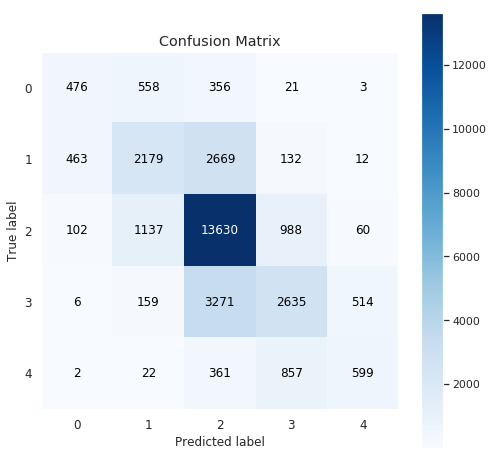

In [21]:
predictions_tuned_random_forest = grid_result_random_forest.predict(xvalid)

print(classification_report(yvalid, predictions_tuned_random_forest))

print()
print("accuracy_score", accuracy_score(yvalid, predictions_tuned_random_forest))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions_tuned_random_forest, average='weighted'))
print("recall_score", recall_score(yvalid, predictions_tuned_random_forest, average='weighted'))
print("f1_score", f1_score(yvalid, predictions_tuned_random_forest, average='weighted'))


print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions_tuned_random_forest)

**Same again in the Random Tree tuning the accuracy and F1 score has no improvement**

**Comparing the accuracy and F1-score between default and tuned parameters in ML models**

In [28]:
ml_tuning_performance_metrics_df.sort_values(by="accuracy", ascending=False)


,accuracy,F1-score,training-time
LogisticRegression,0.658144,0.543156,578.2
LinearSVC,0.65478,0.544711,167.62
ExtraTreesClassifier,0.628893,0.509749,4611.48
RandomForestClassifier,0.625368,0.492604,2321.33


**Although there are some improvements in accuracy and F1-score tuning and in fact provided some minor advantages to out models based on the default and after tuning.**

**Ensemble The top 4 Tuned Models over the validation Set**

              precision    recall  f1-score   support

           0       0.47      0.41      0.44      1414
           1       0.54      0.51      0.53      5455
           2       0.71      0.84      0.77     15917
           3       0.60      0.45      0.52      6585
           4       0.57      0.34      0.42      1841

    accuracy                           0.65     31212
   macro avg       0.58      0.51      0.53     31212
weighted avg       0.64      0.65      0.64     31212


accuracy_score 0.6502947584262463

Weighted Averaged validation metrics
precision_score 0.6384346786665515
recall_score 0.6502947584262463
f1_score 0.6376080218480844



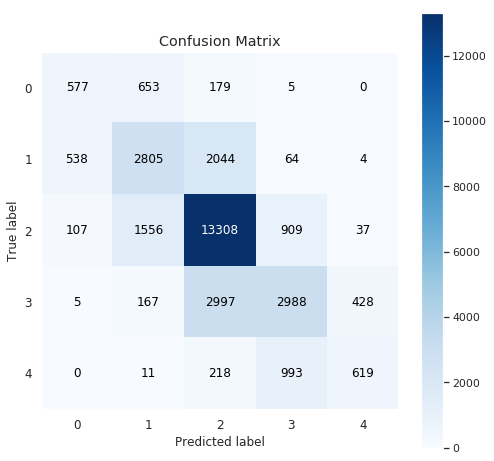

In [30]:
predictions_tuned_linear_svc = grid_result_linear_svc.predict(xvalid)
predictions_tuned_logistic_regression = grid_result_logistic_regression.predict(xvalid)
predictions_tuned_extra_trees = grid_result_extra_trees.predict(xvalid)
predictions_tuned_random_forest = grid_result_random_forest.predict(xvalid)

ensemble_all_ml_tuned_pred_df = pd.DataFrame({
    'linear_svc':predictions_tuned_linear_svc,
    'logistic_regression':predictions_tuned_logistic_regression,
    'extra_trees':predictions_tuned_extra_trees,
    'random_forest':predictions_tuned_random_forest})

pred_tuned_mode = ensemble_all_ml_tuned_pred_df.agg('mode',axis=1)[0].values

print(classification_report(yvalid, pred_tuned_mode))

print()
print("accuracy_score", accuracy_score(yvalid, pred_tuned_mode))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, pred_tuned_mode, average='weighted'))
print("recall_score", recall_score(yvalid, pred_tuned_mode, average='weighted'))
print("f1_score", f1_score(yvalid, pred_tuned_mode, average='weighted'))


print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, pred_tuned_mode)

**ML Predictions with Test Set**

In [0]:

df_test = pd.read_csv("/content/test.tsv", sep="\t")

test_vectorized = vectorizer.transform(df_test['Phrase'])

predictions_tuned_test_linear_svc = grid_result_linear_svc.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_tuned_test_linear_svc
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_tuned_linear_svc.csv',index=False)

predictions_tuned_test_logistic_regression = grid_result_logistic_regression.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_tuned_test_logistic_regression
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_tuned_logistic_regression.csv',index=False)

predictions_tuned_test_extra_trees = grid_result_extra_trees.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_tuned_test_extra_trees
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_tuned_extra_trees.csv',index=False)

predictions_tuned_test_random_forest = grid_result_random_forest.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_tuned_test_random_forest
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_tuned_random_forest.csv',index=False)

**Ensemble Predictions after Tuning from top 4 best performed ML Techniques after tuning**

In [0]:
ensemble_all_ml_tuned_pred_test_df = pd.DataFrame({
    'linear_svc':predictions_tuned_test_linear_svc,
    'logistic_regression':predictions_tuned_test_logistic_regression,
    'extra_trees':predictions_tuned_test_extra_trees,
    'random_forest':predictions_tuned_test_random_forest})


pred_tuned_test_mode = ensemble_all_ml_tuned_pred_test_df.agg('mode',axis=1)[0].values
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = pred_tuned_test_mode
submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_ml_tuned_ensemble.csv',index=False)